In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_0p8mm',
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_v6.yaml"
                                )
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", 
            #"base",
            "baseNoLj_noLoose",
            "baseNoLj_barrel",
            "baseNoLj_endcap",
            "baseNoLj_barrel_sieie",
            "baseNoLj_barrel_hoe", 
            "baseNoLj_barrel_iso",
            "baseNoLj_barrel_eInvMinusPInv",
            "baseNoLj_barrel_lostHists", 
            "baseNoLj_barrel_convVeto",
            "baseNoLj_endcap_sieie",
            "baseNoLj_endcap_hoe", 
            "baseNoLj_endcap_iso",
            "baseNoLj_endcap_eInvMinusPInv",
            "baseNoLj_endcap_lostHists", 
            "baseNoLj_endcap_convVeto"
            #"baseNoLj_sieie"
            #"baseNoLj_noLooseG",
            #"baseNoLj_noLooseE",
            #"baseNoLj_noLoose_ePhotonIdx",
            #"baseNoLj_medium",
           ]
p = sidm_processor.SidmProcessor(
    channels,
    [
        #"electron_base"
        "base_plus_gen", 
        #"lepton_genA_base", 
        #"lepton_genLepton_base"
    ],
    lj_reco_choices=["0.4"],
   
)

output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

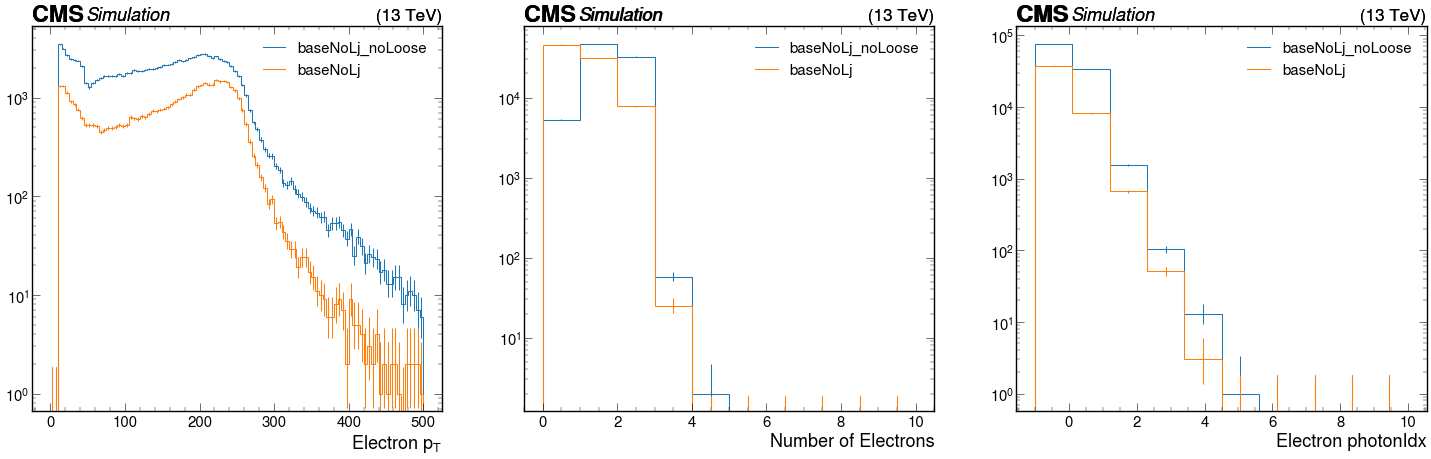

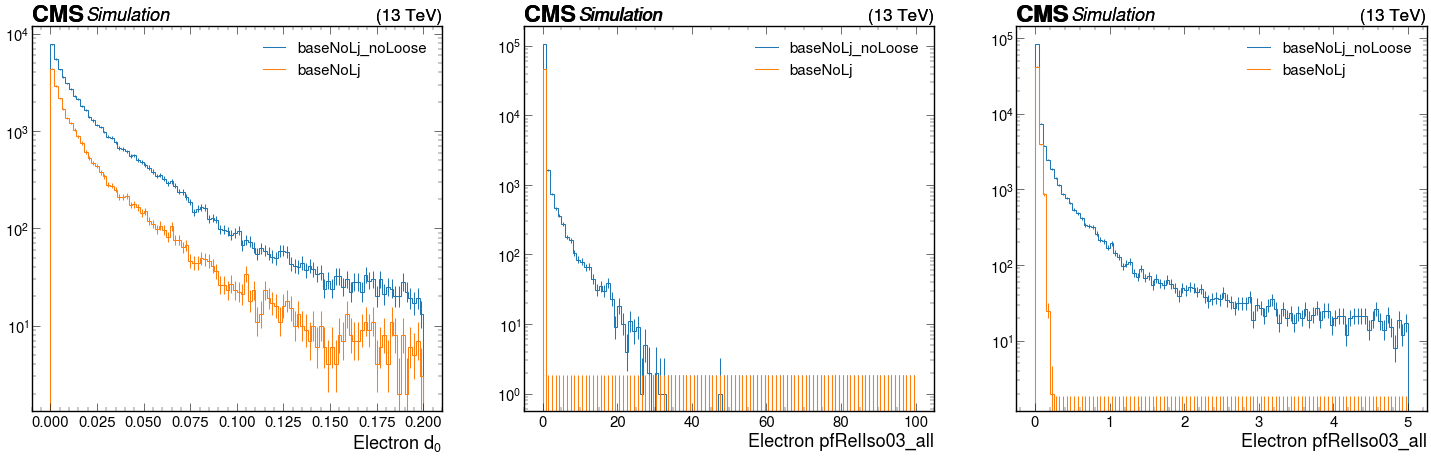

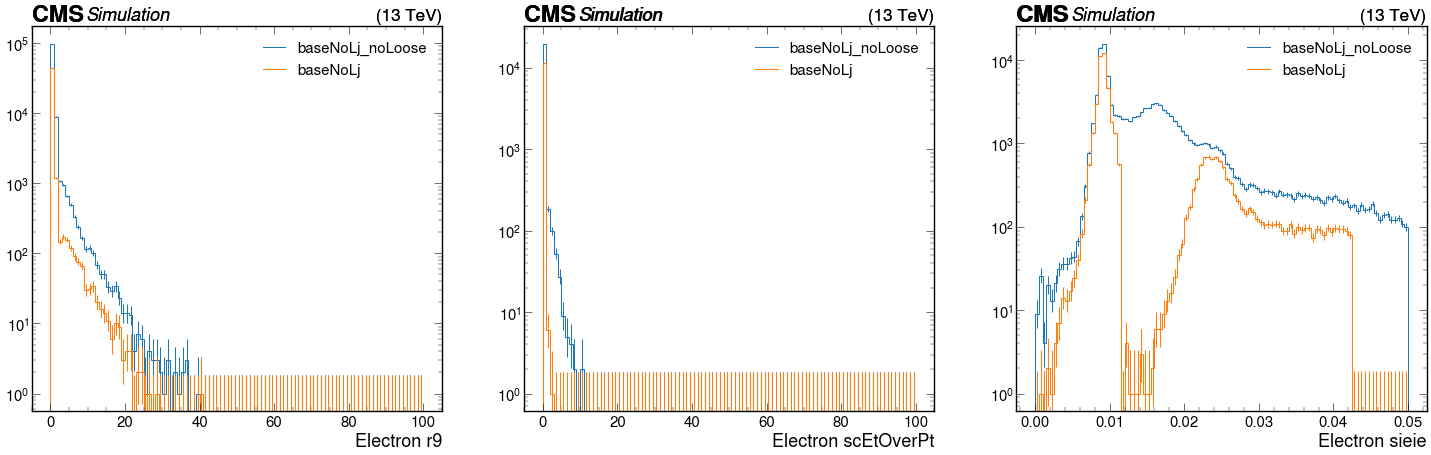

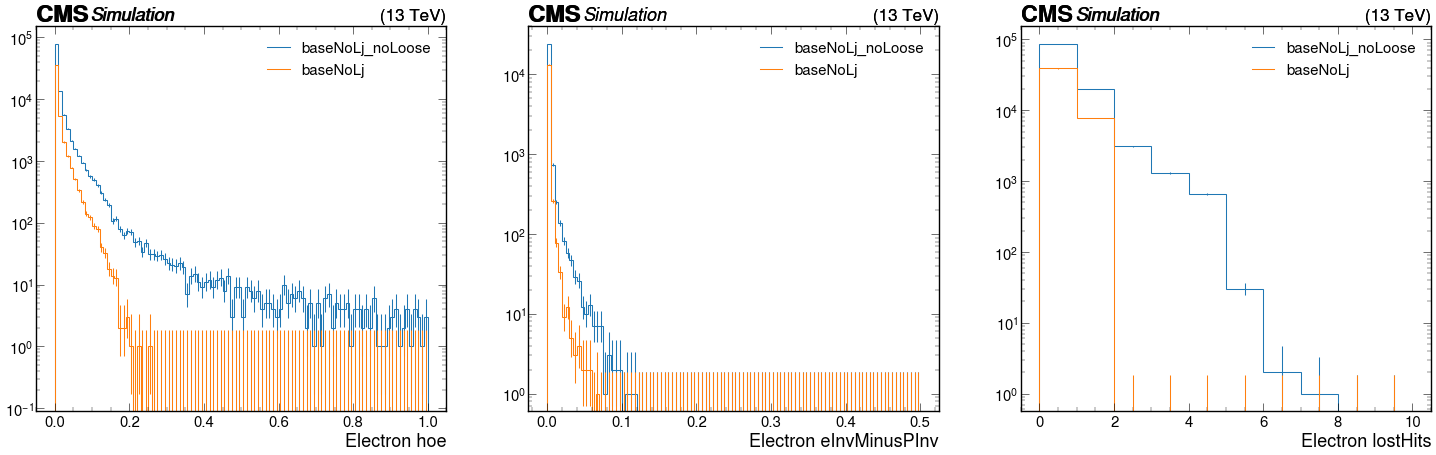

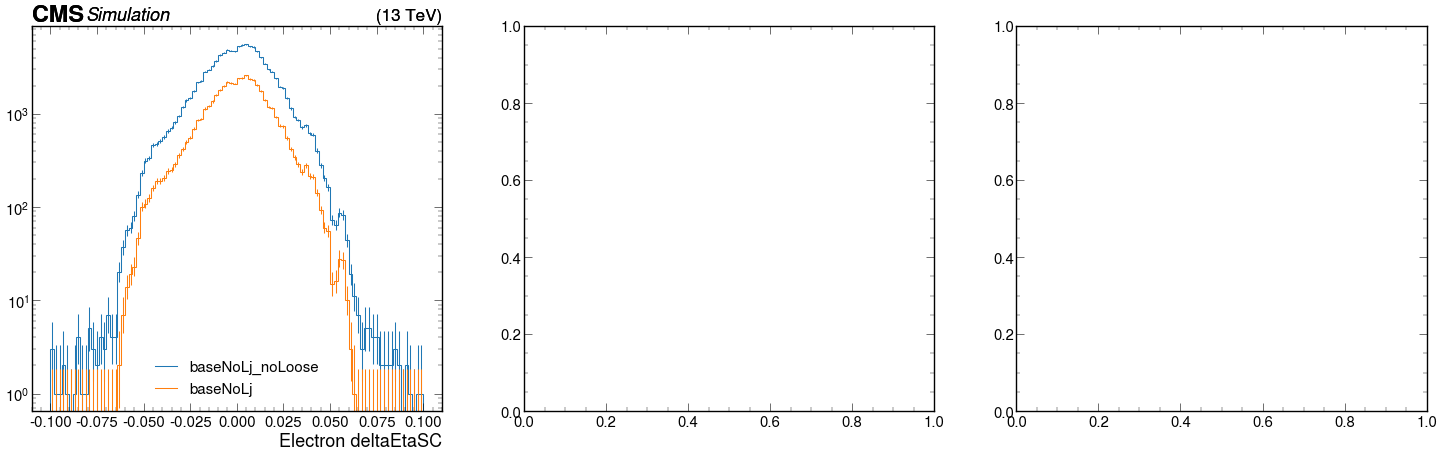

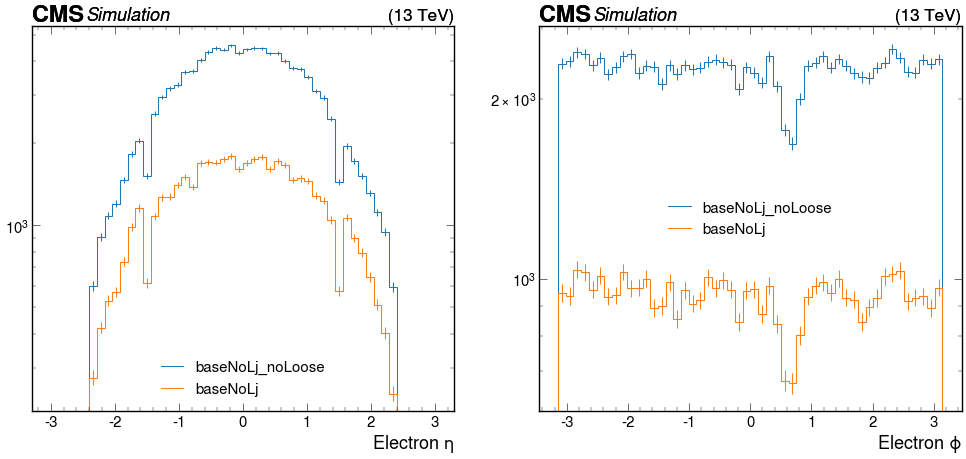

In [3]:
hists = output["out"]["2Mu2E_500GeV_5p0GeV_0p8mm"]["hists"]
channels_list =  ["baseNoLj_noLoose", 
                  "baseNoLj",  
                  #"baseNoLj_barrel", 
                  #"baseNoLj_endcap"
                 # "baseNoLj_sieie"
                 ]
histograms_list = [
                  "electron_pt", "electron_n",  
                   "electron_photonIdx", "electron_dxy", 
                   "electron_pfRelIso03_all", "electron_pfRelIso03_all_lowRange",
                   "electron_r9", "electron_scEtOverPt",
                   "electron_sieie","electron_hoe", "electron_eInvMinusPInv",
                   "electron_lostHits","electron_deltaEtaSC"
                   #"electron_photon_dR", "electron_nearGenE_n","electron_nearGenA_n",
                 ]
for h in range(len(histograms_list)):
    if h%3 == 0:
        fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
        plt.subplot(1, 3, 1)
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:], flow = 'none')
            plt.yscale("log")
            plt.legend(channels_list)
    else:
        plt.subplot(1, 3, (h%3 + 1))
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:], flow = 'none')
            plt.yscale("log")
            plt.legend(channels_list)
            
fig, ax = plt.subplots(1, 2, figsize = (2*12, 10))

plt.subplot(1, 2, 1)
for c in channels_list:
    utilities.plot(hists["electron_eta_phi"][c, :, :].project("electrons_eta"), flow="none" )
plt.yscale("log")
plt.legend(channels_list)
plt.subplot(1, 2, 2)
for c in channels_list:
    utilities.plot(hists["electron_eta_phi"][c, :, :].project("electrons_phi"), flow= "none")
plt.legend(channels_list)
plt.yscale("log")

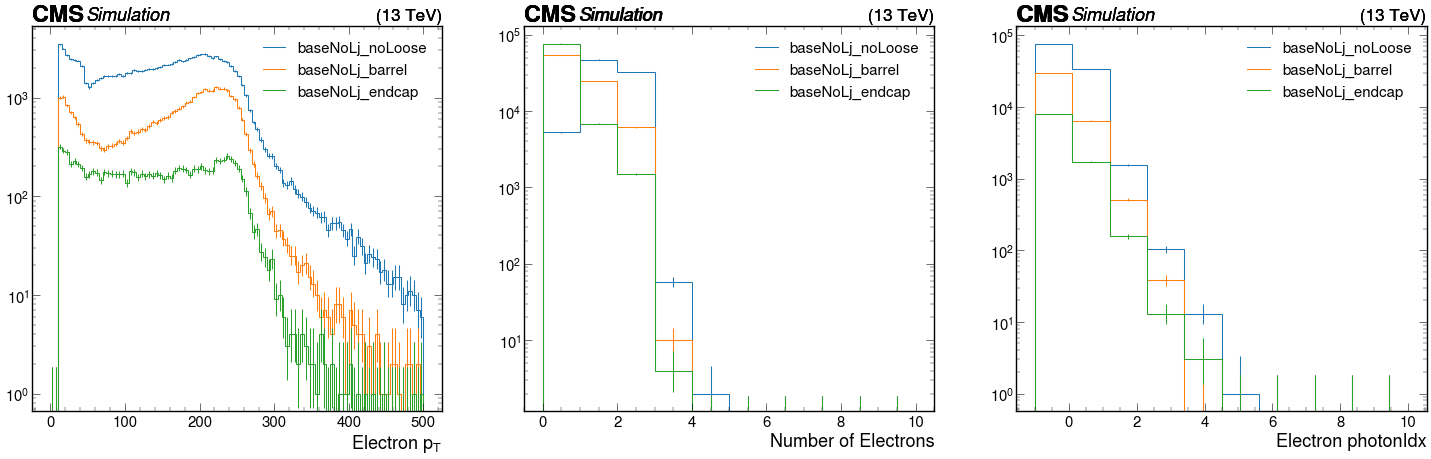

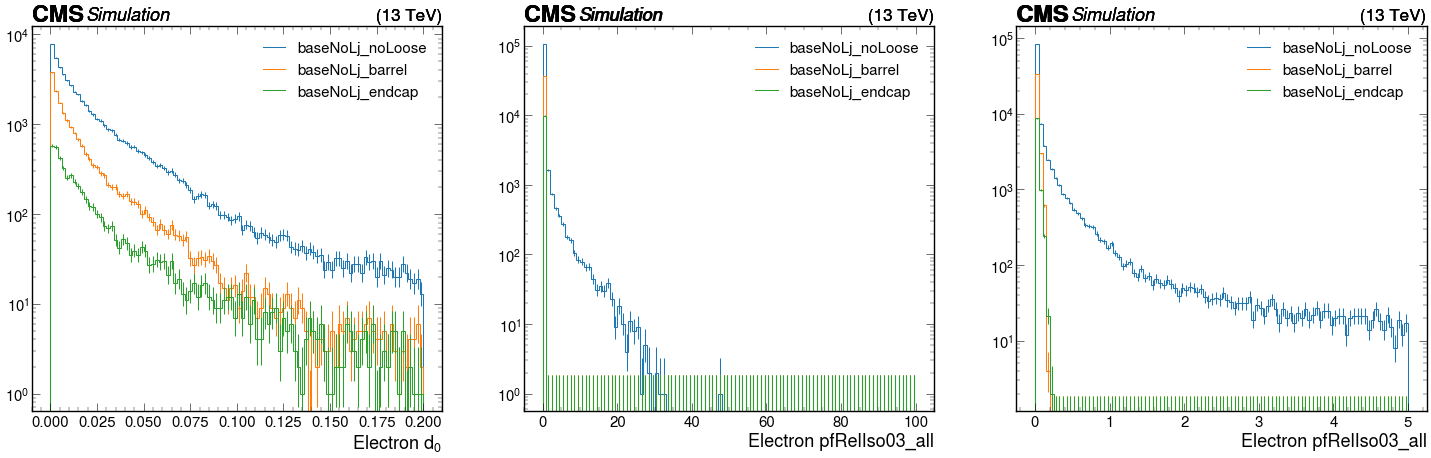

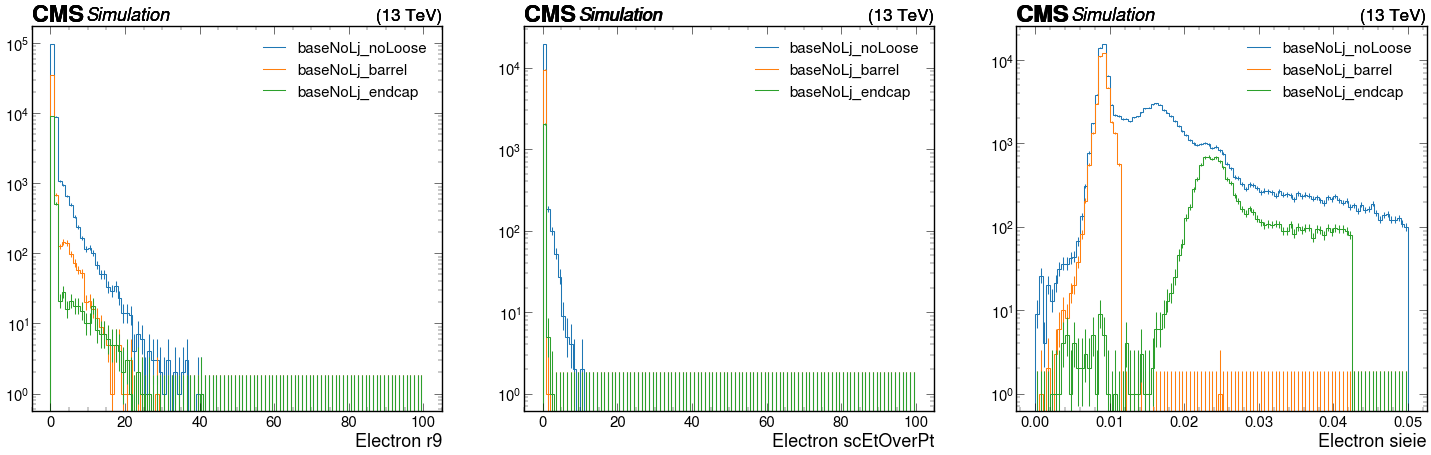

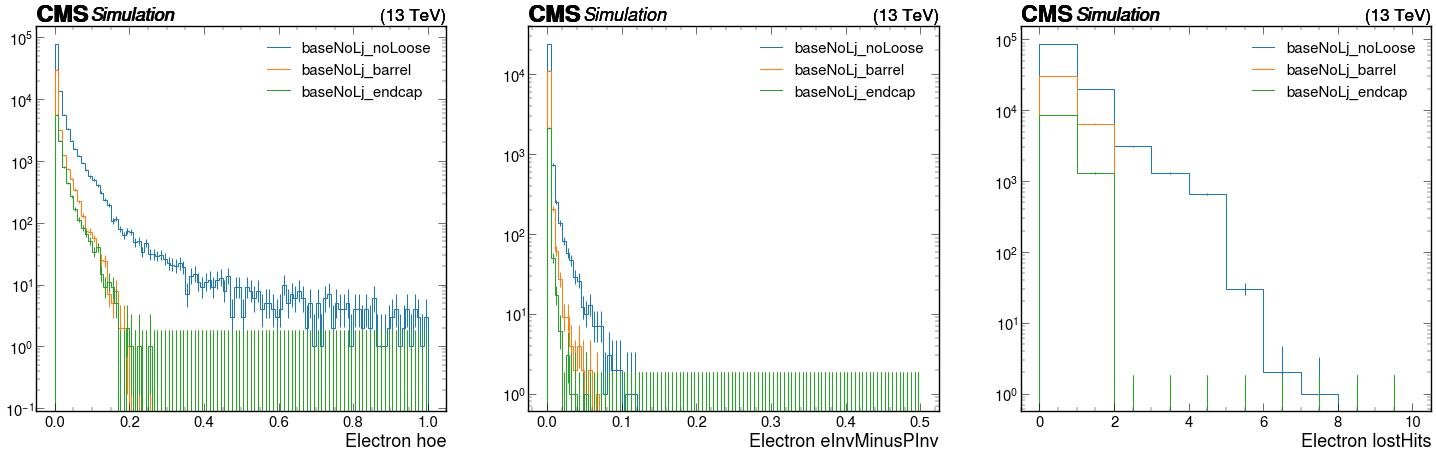

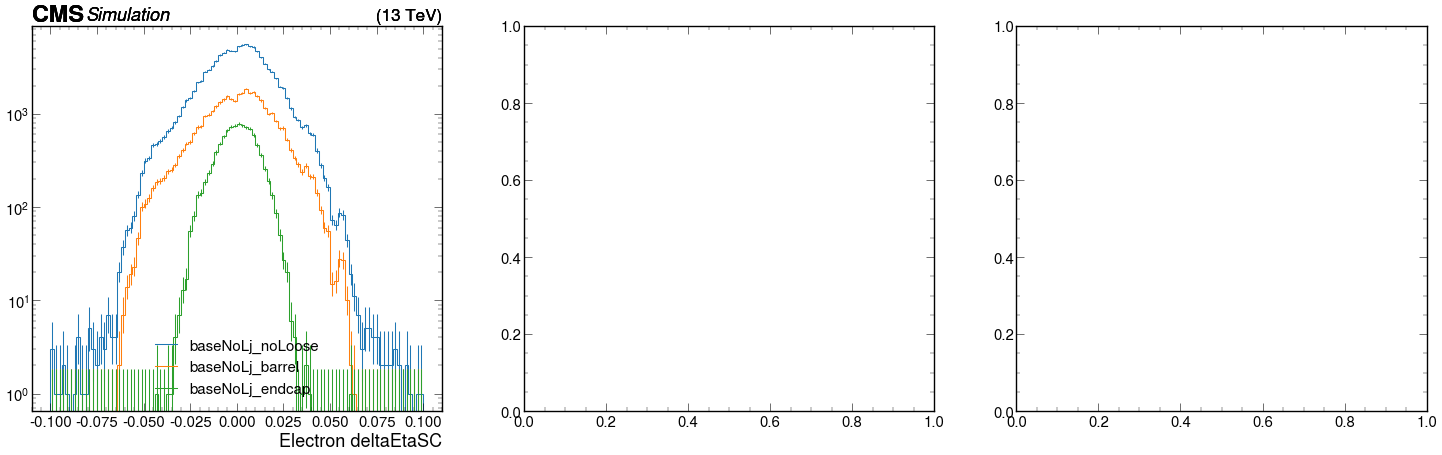

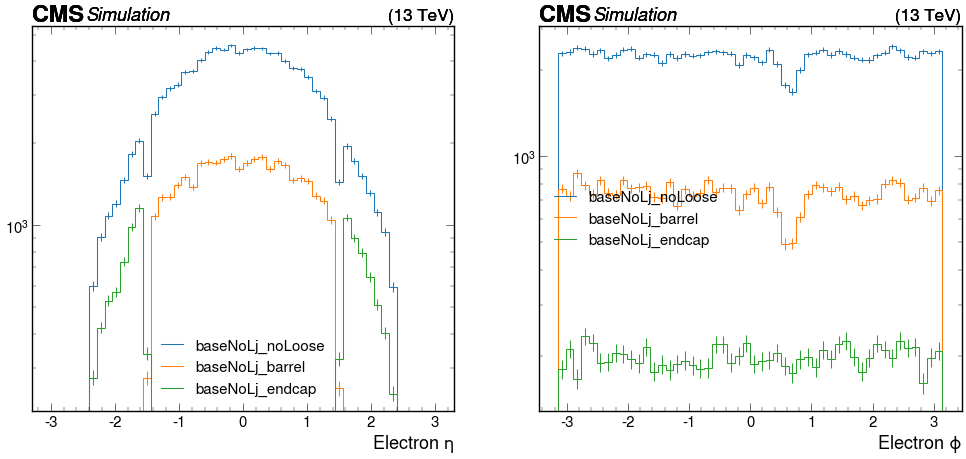

In [4]:

channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_barrel", 
                  "baseNoLj_endcap"
                 # "baseNoLj_sieie"
                 ]
histograms_list = [
                  "electron_pt", "electron_n",  
                   "electron_photonIdx", "electron_dxy", 
                   "electron_pfRelIso03_all", "electron_pfRelIso03_all_lowRange",
                   "electron_r9", "electron_scEtOverPt",
                   "electron_sieie","electron_hoe", "electron_eInvMinusPInv",
                   "electron_lostHits","electron_deltaEtaSC"
                   #"electron_photon_dR", "electron_nearGenE_n","electron_nearGenA_n",
                 ]
for h in range(len(histograms_list)):
    if h%3 == 0:
        fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
        plt.subplot(1, 3, 1)
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:], flow = 'none')
            plt.yscale("log")
            plt.legend(channels_list)
    else:
        plt.subplot(1, 3, (h%3 + 1))
        for c in channels_list:
            utilities.plot(hists[histograms_list[h]][c,:], flow = 'none')
            plt.yscale("log")
            plt.legend(channels_list)
            
fig, ax = plt.subplots(1, 2, figsize = (2*12, 10))

plt.subplot(1, 2, 1)
for c in channels_list:
    utilities.plot(hists["electron_eta_phi"][c, :, :].project("electrons_eta"), flow="none" )
plt.yscale("log")
plt.legend(channels_list)
plt.subplot(1, 2, 2)
for c in channels_list:
    utilities.plot(hists["electron_eta_phi"][c, :, :].project("electrons_phi"), flow= "none")
plt.legend(channels_list)
plt.yscale("log")

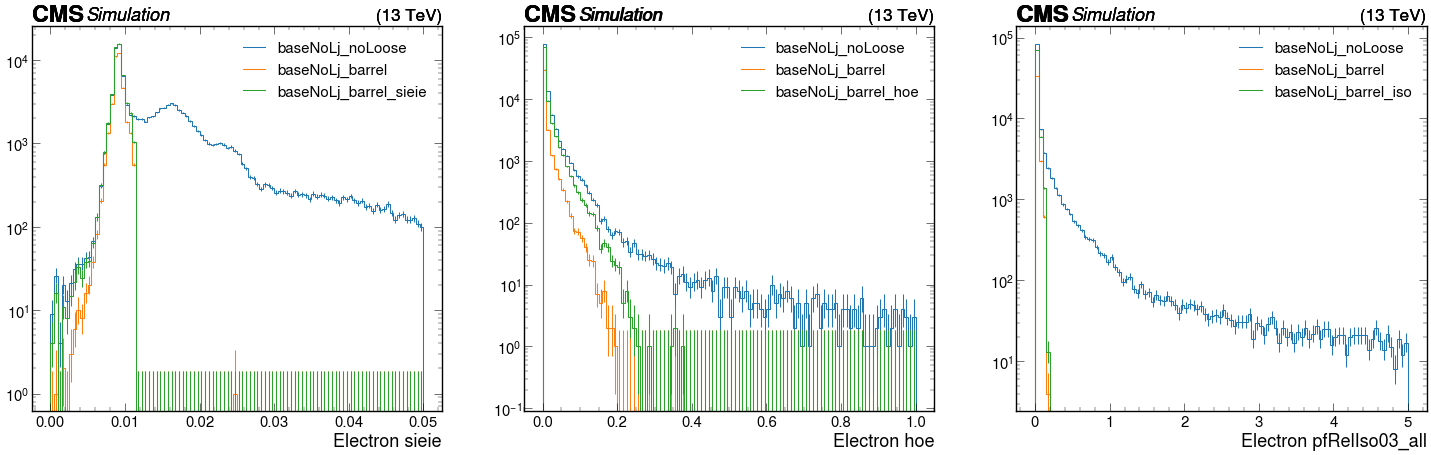

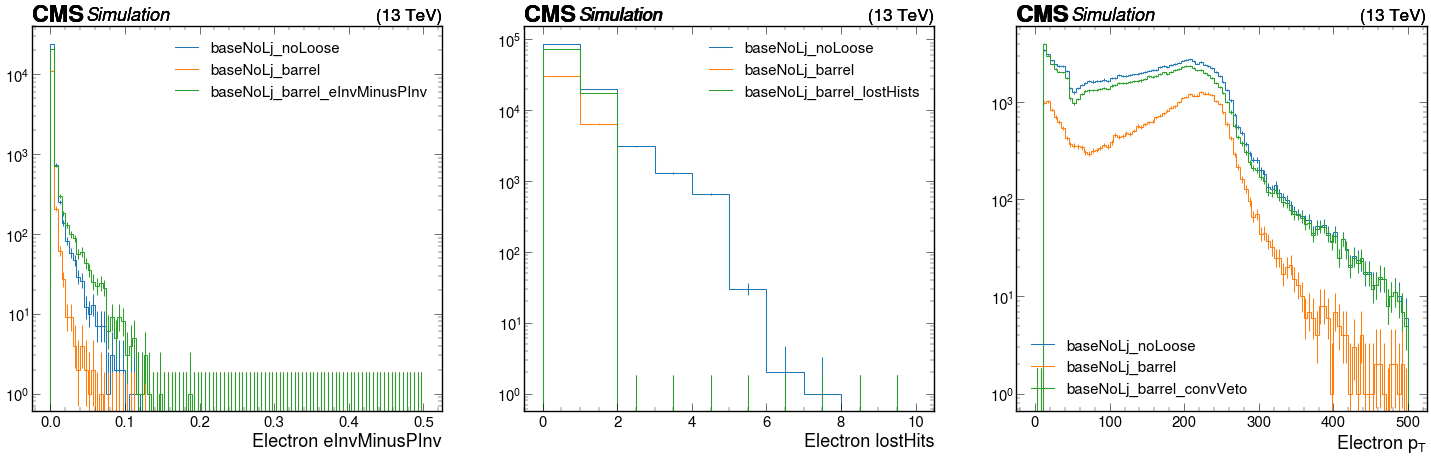

In [5]:

fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
plt.subplot(1, 3, 1)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_barrel", 
                  "baseNoLj_barrel_sieie"
                 ]
for c in channels_list:
    utilities.plot(hists["electron_sieie"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
plt.subplot(1, 3, 2)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_barrel", 
                  "baseNoLj_barrel_hoe"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_hoe"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
plt.subplot(1, 3, 3)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_barrel", 
                  "baseNoLj_barrel_iso"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_pfRelIso03_all_lowRange"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
    
fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
plt.subplot(1, 3, 1)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_barrel", 
                  "baseNoLj_barrel_eInvMinusPInv"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_eInvMinusPInv"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)

plt.subplot(1, 3, 2)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_barrel", 
                  "baseNoLj_barrel_lostHists"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_lostHits"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
    
plt.subplot(1, 3, 3)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_barrel", 
                  "baseNoLj_barrel_convVeto"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_pt"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)


    
 


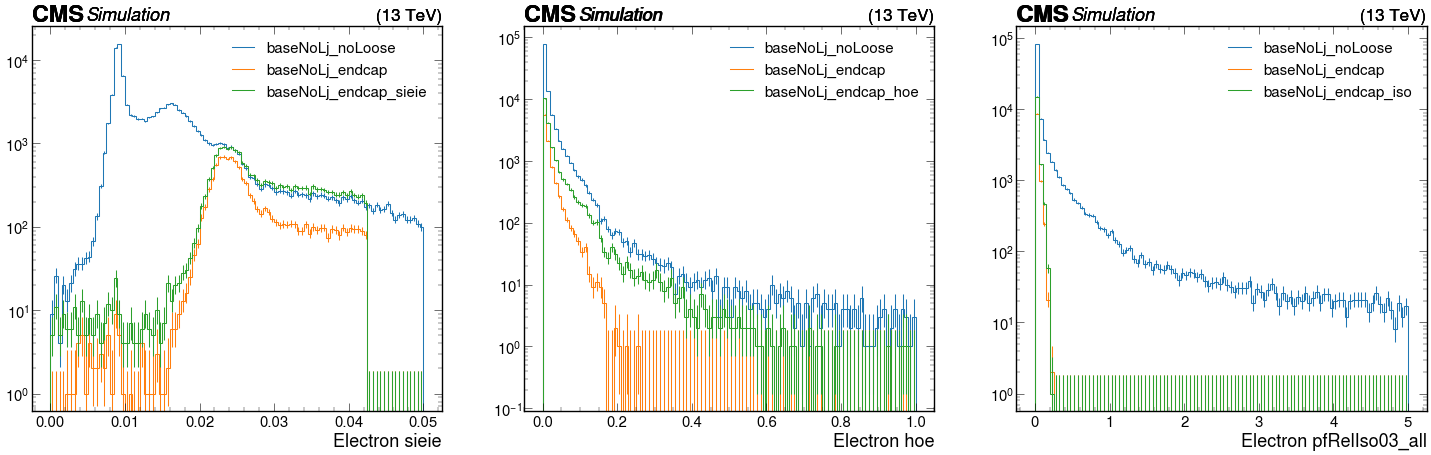

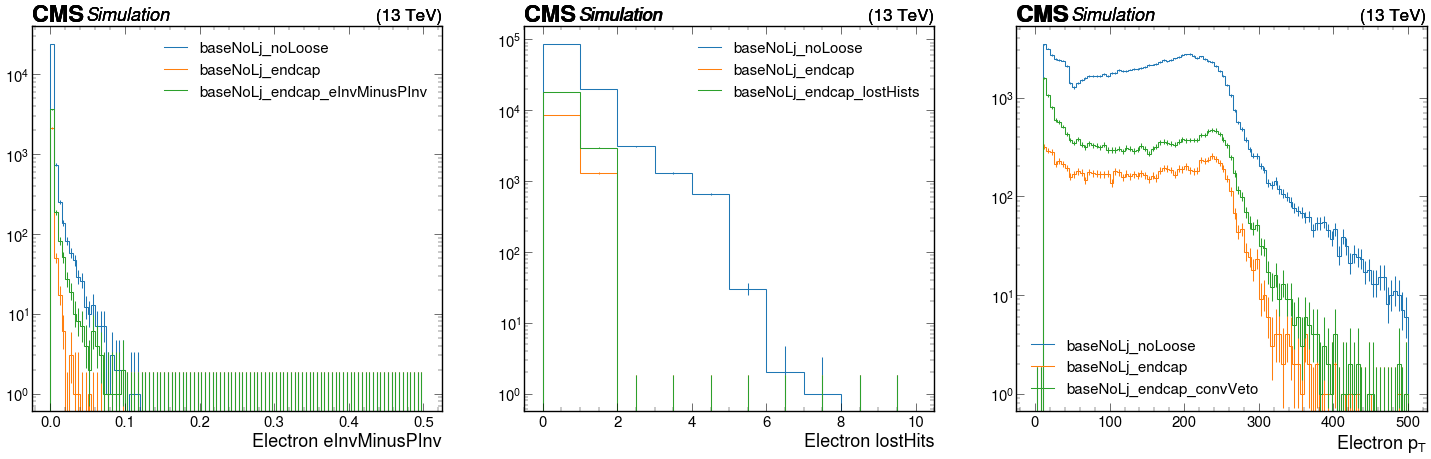

In [6]:

fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
plt.subplot(1, 3, 1)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_endcap", 
                  "baseNoLj_endcap_sieie"
                 ]
for c in channels_list:
    utilities.plot(hists["electron_sieie"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
plt.subplot(1, 3, 2)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_endcap", 
                  "baseNoLj_endcap_hoe"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_hoe"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
plt.subplot(1, 3, 3)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_endcap", 
                  "baseNoLj_endcap_iso"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_pfRelIso03_all_lowRange"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
    
fig, ax = plt.subplots(1, 3, figsize = (3*12, 10))
plt.subplot(1, 3, 1)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_endcap", 
                  "baseNoLj_endcap_eInvMinusPInv"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_eInvMinusPInv"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)

plt.subplot(1, 3, 2)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_endcap", 
                  "baseNoLj_endcap_lostHists"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_lostHits"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)
    
plt.subplot(1, 3, 3)
channels_list =  ["baseNoLj_noLoose", 
                  #"baseNoLj",  
                  "baseNoLj_endcap", 
                  "baseNoLj_endcap_convVeto"
                 ]

for c in channels_list:
    utilities.plot(hists["electron_pt"][c,:], flow = 'none')
    plt.yscale("log")
    plt.legend(channels_list)


    
 


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f68edfd3550>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

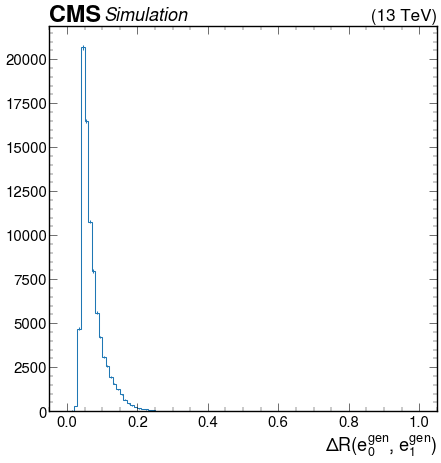

In [7]:
  utilities.plot(hists["genE_genE_dR"]["baseNoLj",:], flow = 'none')